# Rad sa nebalansiranim skupovima podataka

Za skup podataka kažemo da je `nebalansiran` ukoliko ima značajno više instanci jedne klase u odnosu na drugu klasu (ili klase). Na primer, u skupu svih bankarskih transakcija samo jedan mali procenat transakcija nije regularan i podleže zakonskim procedurama. Slično, među pacijentima jedne bolnice može postojati svega par pacijenata koji boluje od neke retke bolesti. U ovim slučajevima je nebalansiranost podataka prirodna za sam fenomen. Postoje i scenariji u kojima je nebalansiranost podataka posledica lošeg odabira uzorka. Na primer, u anketi je ispitivana većinski mlađa populacijia, a ne opšte mnjenje. 

Da bi se neutralisao i ispratio efekat nebalansiranosti u obučavanju modela, može se preduzeti niz aktivnosti.

###  Aktivnosti na skupu podataka 

**Eliminisanje instanci većinske klase (engl. under-sampling)**
Ukoliko je na raspolaganju dovoljan broj instanci manjinske klase, može se izdvojiti isto toliko instanci većinske klase i obučavati model na ovako dobijenom balansiranom skupu. Izbor instanci većinske klase može da bude nasumičan. 

**Generisanje novih instanci (engl. over-sampling)** 
Ukoliko nije na raspolaganju dovoljan broj instanci manjinske klase, može se probati sa generisanjem njenih novih instanci. Na primer, mogu se nasumično ponoviti neke instance, može se iskoristiti tehnika *boosting* kojom se generišu instance iz iste distribucije ili se može iskoristiti *SMOTE* algoritam. Više o ovim pristupima ćemo videti u nastavku.

<img src='assets/under_and_over_sampling.png'>

Oba pomenuta pristupa imaju svoje prednosti i mane. Eliminisanjem instaci može doći do gubitka važnih informacija, dok se generisanjim novih instaci povećava rizik od preprilagođavanja. U oba slučaja nasumičan izbor može biti pristrasan i može uticati na performanse klasifikatora. 

**Ansambli**
U ovom pristupu se teži da se iskoriste svi raspoloživi podaci. Koriste se sve instance manjinske klase i veći broj skupova iste kardinalnosti instanci većinske klase. Na primer, ako imamo 400 instanci manjinske klase i 2000 instanci većinske klase, možemo napraviti 5 skupova podataka sa po 400 instanci manjinske klase i 400 instanci većinske klase. Na svakom od ovih skupova se može naučiti poseban klasifikator, a kao konačna ocena se može uzeti npr. prosek vrednosti. Dalje se u praksi ansambl koristi tako što se pokrenu svi klasifikatori i iskoristiti npr. princip većinskog glasanja za odlučivanje o finalnom obeležju nove instance. 

<img src='assets/resampling_ensamble.png' style='height: 500px;'>
U ovim pristupima se može probati i sa različitim razmerama pozitivne i negativne klase npr. 1:2, 1:3, 2:1 i slično. 

Navodimo još jedan pristup pripreme skupa podataka koji se zasniva na klasterovanju. Većinska klasa se može podeliti u `k` klastera gde `k` predstavlja kardinalnost manjinske klase. Zatim se na osnovu centroida ovako dobijenih klastera može generisati novi skup koji predstavlja većinsku klasu i koji se dalje može koristiti u obučavanju klasifikatora. 

### Adaptacija algoritama
Postoji klasa `cost-sensitive` klasifikatora koji su prilagođeni radu sa nebalansiranim podacima tako što kroz specifične funkcije gubitka navodi na poželjno ponašanje klasifikatora. Na primer, mogu se više kažnjavati pogrešne klasifikacije instanci manjinskih klasa nego pogrešne klasifikacije instanci većinskih klasa. Jedan takav klasifikator je `XGBoost` i njega ćemo upoznati nešto kasnije na krusu. 

### Evaluacija

Za evaluciju modela koji su trenirani na nebalansiranim skupovima podataka nije poželjno koristiti tačnost. Na primer, ovakvi modeli mogu ostvariti visoku tačnost predviđajući uvek obeležja brojnije klase. Poželjnije je koristiti preciznost, odziv, F1-meru, ali i `AUC` meru. 

Kao što smo videli, mere poput preciznosti, odziva ili F1-mere se računaju na osnovu matrice konfuzije i broja tačno klasifikovanih  (TP i TN) i pogrešno klasifikovanih (FP i FN) instanci. Da li je neka instanca dobro klasifikovana ili ne određivali smo na osnovu vrednosti funkcije cilja i praga klasifikacije. U primerima koje smo do sada viđali vrednost praga klasifikacije je bila 0.5, ali se u opštem slučaju za različite potrebe mogu koristiti i druge vrednosti. Ako je za uočenu instancu vrednost funkcije cilja bila veća od praga, pridruživali smo joj obeležje 1, dok smo joj u suprotnom pridruživali vrednost 0. `ROC (Receiver Operating Characteristic)` je kriva koja predstavlja vezu između udela lažno pozitivnih (engl. false positive rate) instanci i udela pravih pozitivnih (engl. true positive rate) instanci za zadati test skup i vrednosti pragova koje se variraju. Podsetimo se, udeo lažno pozitivnih instanci je količnik broja lažno pozitivnih instanci i broja svih negativnih instanci, dok je udeo pravih pozitivnih instanci količnik broja tačno klasifikovanih pozitivnih instanci i broja svih pozitivnih instanci. Udeli se izračunavaju za različite vrednosti praga klasifikacije koji se bira iz intervala [0, 1]. 

Često se za udeo pravih pozitivnih instanci koristi i termin `senzitivnost` (engl. sensitivity), a za udeo pravih negativnih instanci termin `specifičnost` (engl. specificity), pa se govori o krivoj koja povezuje senzitivnost i specifičnost (tačnije vrednost *1-specifičnost*). Primetimo i da se ovi termini preklapaju sa pojmovima preciznosti i odziva.

<img src='assets/ROC_curves_1.png'>

`AUC (Area Under the ROC Curve)` je mera koja predstavlja površinu ispod ROC krive. Interpretiramo je kao količinu  preciznosti koju treba žrtvovati da bi se ostvario visok odziv. U slučaju modela sa slabim performansama, ova vrednost teži broju 0.5 (površina trougla sa sporednom dijagonalom kao hipotenuzom). U slučaju modela sa dobrim performansama, ova vrednost teži broju 1 (površina celog kvadrata).  

<img src='assets/ROC_curves_2.png'>

Predlažemo da pogledate kratak video i istražite vizuelizaciju dostupnu u okviru pregleda na [ovoj](https://www.dataschool.io/roc-curves-and-auc-explained/) adresi. 

<p class='bg-info' style='padding: 20px'>
Python paket <a href='https://github.com/scikit-learn-contrib/imbalanced-learn'> imbalanced-learn </a> nudi mogućnost rada sa svim gore pomenutim tehnikama. Koristićemo ga u daljem radu pa je potrebno instalirati ga komandom <b> conda install -c conda-forge imbalanced-learn</b>. 
<br>
<br> 
Za više informacija pogledati i <a href='https://imbalanced-learn.org/stable/user_guide.html'> zvaničnu dokumentaciju </a> ovog paketa.
</p>

### Zadatak

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [68]:
import imblearn

Potrebno je napraviti klasifikator koji razlikuje regularne i neregularne bankarske transakcije. Skup podataka sa kojim ćemo raditi je preuzet sa [Kaggle platforme](https://www.kaggle.com/mlg-ulb/creditcardfraud). Stoga je potrebno da prvo prevučete odgovarajuću `creditcard.csv` datoteku. 

In [4]:
data = pd.read_csv('data/creditcard.csv')

Dalje ćemo ispitati neka osnovna svojstva skupa.

In [5]:
data.shape

(284807, 31)

In [6]:
N = data.shape[0]

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Atribut `Time` predstavlja broj sekundi proteklih izmedju tekuće transakcije i prve transakcije u skupu podataka i nećemo ga koristiti u daljem radu. 

In [8]:
data.drop(columns=['Time'], axis=1, inplace=True)

Atributi `V1`, ...., `V28` predstavljaju kolone dobijene redukciom dimenzionalnosti originalnog skupa kako bi se zaštitila privatnost podataka korisnika. Njih ćemo koristiti za razvoj našeg modela.

Atribut `Amount` predstavlja iznos obavljene transakcije.

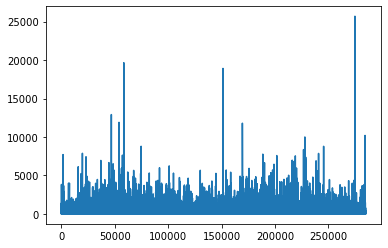

In [9]:
plt.plot(np.arange(0, N), data['Amount'])

Koristićemo log-vrednost ovog atributa kako bi suzili opseg vrednosti. 

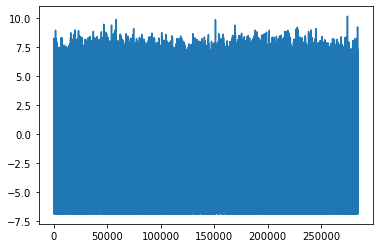

In [10]:
# Da bi se izbegle nula vrednosti dodacemo malu vrdnost iznosima transakcije
eps = 0.001
plt.plot(np.arange(0, N), np.log(data['Amount']+ eps))

In [11]:
data['LogAmount'] = np.log(data['Amount'] + eps)
data.drop(columns=['Amount'], axis=1, inplace=True)

Atribut `Class` ukazuje da li je transakcija regularna (vrednost `0`) ili ne (vrednost `1`).

In [12]:
class_distribution = data['Class'].value_counts()

In [13]:
class_distribution

0    284315
1       492
Name: Class, dtype: int64

Odnos instanci možemo prikazati i grafički.

[]

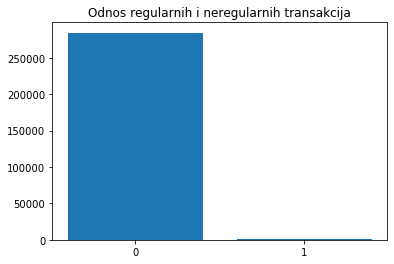

In [14]:
plt.title('Odnos regularnih i neregularnih transakcija')
plt.bar(class_distribution.index, class_distribution.values)
plt.xticks(class_distribution.index)
plt.plot()

Odavde možemo uvideti da je reč o visoko nebalansiranom skupu podataka.

Podelićemo podatke na skup za treniranje i skup za testiranje u razmeri 2:1. Pritom ćemo voditi računa o stratifikaciji.

In [15]:
X = data.drop(columns=['Class'], axis=1)
y = data['Class']

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y)

Dalje ćemo da standardizujemo podatke. 

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Početni model - logistička regresija

Početni model sa kojim ćemo se oprobati će biti model logističke regresije.

In [18]:
logistic_regression = linear_model.LogisticRegression()

In [19]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluacija početnog modela: 

In [20]:
y_predicted = logistic_regression.predict(X_test)

In [21]:
metrics.confusion_matrix(y_test, y_predicted)

array([[93811,    14],
       [   59,   103]])

In [22]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.88      0.64      0.74       162

    accuracy                           1.00     93987
   macro avg       0.94      0.82      0.87     93987
weighted avg       1.00      1.00      1.00     93987



U slučaju nebalansiranih skupova podataka, tačnost nije relevantna mera. Na primer, u našem slučaju, klasifikator može postići visoku tačnost predviđajući uvek vrednost `0`. Metrike za klasu `0` su dobre, ali za klasu `1` postoji prostor za poboljšanje. Cilj je smanjiti broj lažno negativnih vrednosti jer u ovom slučaju imaju mnogo veći praktični značaj.  

Za izračunavanje AUC vrednosti i iscrtavanje ROC krive, mogu se iskoristiti funkcije `roc_auc_score` i `plot_roc_curve` paketa `metrics`. 

Napomena: Da bi mogla da se koristi funkcija `plot_roc_curve`, verzija `scikit-learn` paketa mora da bude bar `0.22.2`.

In [23]:
metrics.roc_auc_score(y_test, y_predicted)

0.8178266275868196

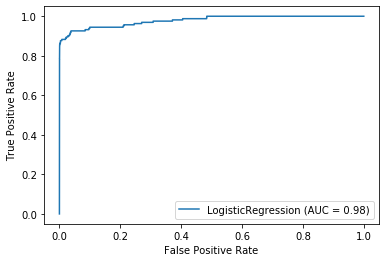

In [24]:
metrics.plot_roc_curve(logistic_regression, X_test, y_test)

<p class='bg-info' style='padding: 20px'>
    Zadatak: 
    <br>
    Razmislite kako bi funkcija plot_roc_curve mogla da se implementira. 
</p>

### Logistička regresija sa eliminaciom instanci

Dalje ćemo ispitati ponašanje modela logističke regresije kojem prethode transformacije skupa podataka.

Podsetimo se, polazna brojnost klasa je:

In [25]:
np.bincount(y_train)

array([190490,    330])

Instance većinske klase ćemo elminisati korišćenjem `RandomUnderSampler` metode `imblearn` paketa. Parametrom `ratio` se utiče na željeni odnos broja instanci manjinske (N_m) i većinske (N_M) klase nakon eliminacije.   

In [26]:
ratio = 1/5
rus = imblearn.under_sampling.RandomUnderSampler(random_state=0, sampling_strategy=ratio)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

Brojnost klasa nakon brisanja instanci je:

In [27]:
np.bincount(y_train_resampled)

array([1650,  330])

Kreiraćemo dalje novi model i ispitati njegove performanse:

In [28]:
logistic_regression_undersampled = linear_model.LogisticRegression()

In [29]:
logistic_regression_undersampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_predicted = logistic_regression_undersampled.predict(X_test)

In [31]:
metrics.confusion_matrix(y_test, y_predicted)

array([[93269,   556],
       [   21,   141]])

In [32]:
metrics.roc_auc_score(y_test, y_predicted)

0.9322222222222222

Možemo primetiti da se broj FN instanci smanjio, ali da se broj FP instanci povećao. 
Takodje, možemo primetiti da je AUC veći. 

### Logistička regresija sa generisanjem novih instanci

Podsetimo se, polazna brojnost klasa je:

In [33]:
np.bincount(y_train)

array([190490,    330])

Instance manjinske klase ćemo umnožiti nasumičnim ponavljanjem uz korišćenje `RandomOverSampler` metode `imblearn` paketa. Parametrom `ratio` se utiče na željeni odnos broja instanci manjinske (N_m) i većinske (N_M) klase nakon umnožavanja.   

In [34]:
ratio = 1/5
ros = imblearn.over_sampling.RandomOverSampler(random_state=0, sampling_strategy=ratio)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Brojnost klasa nakon umnožavanja instanci:

In [35]:
np.bincount(y_train_resampled)

array([190490,  38098])

Kreiraćemo dalje novi model i ispitati njegove performanse:

In [36]:
logistic_regression_oversampled = linear_model.LogisticRegression()

In [37]:
logistic_regression_oversampled.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_predicted = logistic_regression_oversampled.predict(X_test)

In [39]:
metrics.confusion_matrix(y_test, y_predicted)

array([[93388,   437],
       [   21,   141]])

In [40]:
metrics.roc_auc_score(y_test, y_predicted)

0.9328563815614175

### SMOTE

[SMOTE (Syntetic Minority Over-sampling Technique)](https://arxiv.org/pdf/1106.1813.pdf) je jedan od najpoznatijih algoritama za generisanje sintetičkih instanci. Za svaku instancu manjinske klase posmatra se okolina k-najbližih suseda, takođe pripadnika manjinske klase. Duž pravaca koji spajaju uočenu instancu i njene susede (sve ili neke od njih u zavisnosti od potrebe) interpoliraju se nove instance. S obzirom da nema eskplicitnog ponavljanja instanci, ublažena je mogućnost preprilagođavanja. Nažalost, tehnika može uvesti dodatni šum među podacima ukoliko se u okolinama koje se posmatraju nalaze i instance većinske klase.  
<img src='assets/SMOTE.png'>

Podsetimo se, polazna brojnost klasa je:

In [41]:
np.bincount(y_train)

array([190490,    330])

I algoritam `SMOTE` kao jedan od parametara ima `ratio` kojim se utiče na željeni odnos broja instanci. Ukolliko se izostavi (i ovde i u drugim algoritmima) pokušava se sa generisanjem skupova iste kardinalnosti.

In [42]:
smote = imblearn.over_sampling.SMOTE(random_state=0, k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Brojnost klasa nakon generisanja instanci:

In [43]:
np.bincount(y_train_resampled)

array([190490, 190490])

Kreiraćemo dalje novi model i ispitati njegove performanse:

In [44]:
logistic_regression_smote = linear_model.LogisticRegression()

In [45]:
logistic_regression_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_predicted = logistic_regression_smote.predict(X_test)

In [47]:
metrics.confusion_matrix(y_test, y_predicted)

array([[91220,  2605],
       [   13,   149]])

In [48]:
metrics.roc_auc_score(y_test, y_predicted)

0.9459943156585843

<p class='bg-info' style='padding: 20px'>
    Zadatak: 
    <br>
    Eksperimentisati sa drugim tehnikama pripreme podataka. 
</p>

### Logistička regresija sa težinama

U osnovi ovog pristupa je ideja o pridruživanju različitih težina instancama različitih klasa. Veće vrednosti težina instanci ukazuju klasifikatoru da obrati *više pažnje* na njih. 

In [49]:
from sklearn import utils

Težine su podrazumevano obrnuto proproporcionalne kardinalnostima klasa. Metoda `compute_class_weight` paketa `utils` nam daje uvid u ove vrednosti. Prilikom poziva metode za tip težina je potrebno navesti `balanced`. 

In [50]:
class_labels = np.unique(y_train)
number_of_classes = class_labels.size 

In [51]:
utils.class_weight.compute_class_weight('balanced', class_labels, y_train)

array([  0.50086619, 289.12121212])

U pozadini ove računice je formula za računanje težina: $$ w_i = \frac{velicinaTreningSkupa}{brojKlasa \cdot brojInstaciKlaseC_i}$$

In [52]:
weights = y_train.size /(number_of_classes * np.bincount(y_train))

In [53]:
weights

array([  0.50086619, 289.12121212])

Kreiraćemo novi model logističke regresije koji se zasniva na pridruživanju težina instancama. Dovoljno je vrednost atributa `class_weight` postaviti na vrednost `balanced` da bi se težine izračunale i pridružile na gore opisani način.

In [54]:
logistic_regression_with_weights = linear_model.LogisticRegression(class_weight='balanced')

In [55]:
logistic_regression_with_weights.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_predicted = logistic_regression_with_weights.predict(X_test)

In [57]:
metrics.confusion_matrix(y_test, y_predicted)

array([[91474,  2351],
       [   14,   148]])

In [58]:
metrics.roc_auc_score(y_test, y_predicted)

0.9442614797051249

Težine se mogu pridruživati instancama i proizvoljno zadavanjem odgovarajućeg rečnika za vrednost `class_weight` atributa:

In [59]:
logistic_regression_with_custom_weights = linear_model.LogisticRegression(class_weight={0:0.05, 1: 200})

Ovakvo konstruisanje klasifikatora kaže da instancama klase 0 treba pridružiti težine 0.05, a instancama klase 1 težine 200.

U opštem slučaju se težine biraju nakon većeg broja eksperimenata sa različitim vrednostima. Sledeći primer ilustruje proceduru. Testiraćemo kako model radi za različite vrednosti težina (ukupno 4 kombinacije) i odabrati onu kombinaciju težina koja daje najbolju vrednost AUC mere. 

**Napomena:** Vrednosti težina zapravo nije dobro birati na osnovu skupa za testiranje već na osnovu takozvanog `validacionog` skupa. O izboru parametara kojim se konfigurišu modeli (takozvani hiperparametri ili metaparametri) će biti više reči u delu o evaluaciji. 

In [60]:
class_weights = [{0: 0.01, 1: 290}, {0: 0.05, 1: 350}, {0: 0.05, 1: 290}, {0:0.05, 1: 200}]

In [61]:
class_weights

[{0: 0.01, 1: 290}, {0: 0.05, 1: 350}, {0: 0.05, 1: 290}, {0: 0.05, 1: 200}]

In [62]:
roc_auc_scores = []

In [63]:
for class_weight in class_weights:
    logistic_regression_with_custom_weights = linear_model.LogisticRegression(class_weight=class_weight)
    logistic_regression_with_custom_weights.fit(X_train, y_train)
    y_predicted = logistic_regression_with_custom_weights.predict(X_test)
    roc_auc_score = metrics.roc_auc_score(y_test, y_predicted)
    roc_auc_scores.append(roc_auc_score)

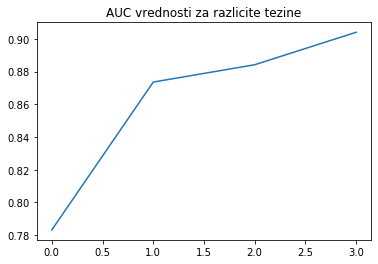

In [64]:
plt.title('AUC vrednosti za razlicite tezine')
plt.plot(np.arange(0, len(class_weights)), roc_auc_scores)

Najveća vrednost AUC mere se dobija za treću kombinaciju.

In [65]:
argmax = np.argmax(roc_auc_scores)
argmax

3

In [66]:
optimal_weights = class_weights[argmax]
optimal_weights

{0: 0.05, 1: 200}

Maksimalna AUC vrednost koja se dobija je: 

In [67]:
roc_auc_scores[argmax]

0.9040323296918022

Ovaj pristup se može generalizovati i na druge binarne klasifikatore. Svi oni imaju `balanced` parametar.

<div class='bg-info' style='padding: 20px'>
Za dalje čitanje:
<ul> 
    <li> <a href='https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28'> Handling imbalanced datasets in ML </a> </li>
</ul>
</div>